# Overfitting, testing-training, Cross-validation

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

## Overfitting

Example with random data

In [198]:
n = 100
x = np.random.normal(size=n)
z = np.random.normal(size=n)
z1 = np.random.normal(size=n)
z2 = np.random.normal(size=n)
z3 = np.random.normal(size=n)
z4 = np.random.normal(size=n)
z5 = np.random.normal(size=n)
y = x + np.random.normal(size=n)
# note: y does not depend on z

In [199]:
dat = pd.DataFrame({'y' : y, 'x': x, 'z': z, 'z1':z1, 'z2':z2, 'z3':z3, 'z4':z4, 'z5':z5})


In [200]:
m = smf.ols(formula='y ~ 1 + x + z + z1 + z2 + z3 + z4 + z5', data=dat).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     13.61
Date:                Mon, 07 May 2018   Prob (F-statistic):           5.83e-12
Time:                        14:25:54   Log-Likelihood:                -129.17
No. Observations:                 100   AIC:                             274.3
Df Residuals:                      92   BIC:                             295.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Inte

## Testing-training

In [201]:
indices = range(len(dat))
itest = np.random.choice(indices, int(0.2*len(indices)), False)
# last False: no replacements
itrain = list(set(indices).difference(itest))
testDat = dat.iloc[itest]
trainDat = dat.iloc[itrain]


In [211]:
m = smf.ols(formula='y ~ x + z + z1 + z2 + z3 +z4', data=trainDat).fit()
yhat = m.predict(exog=dict(testDat))
mse = np.mean((yhat - testDat.y)**2)
print(mse)


1.1279749170203037


## k-fold CV

In [213]:
k = 10
indices = np.arange(len(dat))
np.random.shuffle(indices)


In [214]:
rmse1 = np.empty(k)
rmse2 = np.empty(k)
for i in range(k):
    itest = indices[i::k]
    itrain = list(set(indices).difference(itest))
    testDat = dat.iloc[itest]
    trainDat = dat.iloc[itrain]
    m1 = smf.ols(formula='y ~ x', data=trainDat).fit()
    m2 = smf.ols(formula='y ~ x + z', data=trainDat).fit()
    yhat1 = m1.predict(exog=dict(testDat))
    yhat2 = m2.predict(exog=dict(testDat))
    rmse1[i] = np.sqrt(np.mean((yhat1 - testDat.y)**2))
    rmse2[i] = np.sqrt(np.mean((yhat2 - testDat.y)**2))

    print(np.mean(rmse1))
print(np.mean(rmse2))    

0.90668029999077
0.9253938983516182


## Exercise:

Create an image of overfitting with only a few datapoints (say 10..20). 

* create random x (standard normal or uniform)
* create random y = constant + random noise
* plot x versus y
* estimate models y ~ x, y ~ x + x^2, y ~ x + x^2 + x^3 ...
* predict yhat on a grid
* plot x versus predicted yhat

## Bootstrap

What is the 10th percentile of pareto random variables?

How to find it's standard errors?

In [222]:
n = 100
r = 1000
x = np.random.pareto(2, size=n)
np.percentile(x, 10)

0.0857860204825368

0.02812955585425779 0.0996909837781896


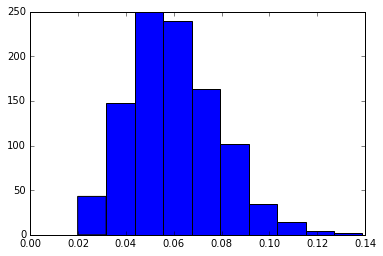

In [223]:
x = np.random.pareto(2, size=(r,n))
p10 = pd.DataFrame(x).apply(lambda x: np.percentile(x, 10), axis=1)
lb, ub = np.percentile(p10, 2.5), np.percentile(p10, 97.5)
print(lb, ub)
a = plt.hist(p10)

0.029239984104263872 0.10526115780414202


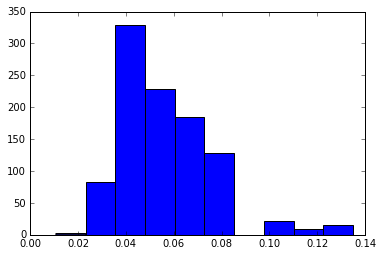

In [224]:
x = np.random.pareto(2, size=n)
p10 = np.empty(r)
for i in range(r):
    xx = np.random.choice(x, len(x))
    p10[i] = np.percentile(xx, 10)

lb, ub = np.percentile(p10, 2.5), np.percentile(p10, 97.5)
print(lb, ub)
a = plt.hist(p10)    